In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
# %matplotlib qt
import sys
sys.path.append('C:\code\qdc2')
import matplotlib.pyplot as plt 
import os 
import numpy as np 
from qdc.mmf.many_wl_fiber import ManyWavelengthFiber
from qdc.mmf.qdc_experiment import QDCMMFExperiment
from qdc.misc import tnow
DATA_DIR = os.path.join(os.path.abspath(os.path.curdir), 'data')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
is_step_index = False
fiber_L = 0.1e6  if is_step_index else 2e6 # um 
N_wl = 81
N_classical = 100
N_SPDC = 100
wl0 = 0.810
Dwl = 0.020 if is_step_index else 0.020
NA_ref = 0.2   
dzs = [0, 10, 50, 200, 1000] if is_step_index else [0, 10, 50, 80]
# dzs = [0]
free_mode_matrix = True
autosolve = not free_mode_matrix

npoints = 2**8
n_pixels_diameter = 2*npoints//5 if is_step_index else npoints//4
s = ManyWavelengthFiber(wl0=wl0, Dwl=Dwl, N_wl=N_wl, fiber_L=fiber_L, rng_seed=5555, is_step_index=is_step_index, 
                        npoints=npoints, NA_ref=NA_ref, autosolve=autosolve)
s.gaussian_params = np.array([2.7, 7, 10, 0.5, 0.5]) 
s.gaussian_dparams = np.array([1, 5, 5, 0.3, 0.3])
# s.gaussian_dparams = np.array([0, 4, 4, 0.1, 0.1])

exp = QDCMMFExperiment(s, free_mode_matrix=free_mode_matrix)
exp._set_PCC_slice(n_pixels_diameter=n_pixels_diameter)
res = exp.run_PCCs_different_dz(dzs=dzs, N_classical=N_classical, N_SPDC=N_SPDC)
# res.show(title='')
# res.show_incoherent_sum()

f_type = 'SI' if is_step_index else 'GRIN'
saveto_path = rf'{DATA_DIR}\\{tnow()}_{f_type}_{round(fiber_L*1e-6, 2)}m_N=100.npz'
res.saveto(saveto_path)

Getting 81 fibers...


81it [00:04, 19.43it/s]


Got fibers!
Getting classical with average on 100 ...


Running classical measurements: 100%|██████████| 100/100 [1:32:56<00:00, 55.77s/it]


Getting SPDC with average on 100, dz=0 ...


Running SPDC measurements: 100%|██████████| 100/100 [3:04:16<00:00, 110.57s/it] 


Getting SPDC with average on 100, dz=10 ...


Running SPDC measurements: 100%|██████████| 100/100 [3:05:43<00:00, 111.44s/it] 


Getting SPDC with average on 100, dz=50 ...


Running SPDC measurements: 100%|██████████| 100/100 [3:05:37<00:00, 111.37s/it] 


Getting SPDC with average on 100, dz=80 ...


Running SPDC measurements: 100%|██████████| 100/100 [3:04:43<00:00, 110.83s/it] 


In [17]:
f_type = 'SI' if is_step_index else 'GRIN'
saveto_path = rf'{DATA_DIR}\\{tnow()}_{f_type}_{round(fiber_L*1e-6, 2)}m_N=100.npz'
res.saveto(saveto_path)

In [33]:
res.metadata["g_params_list"]

[array([ 3.63623119, 11.8141825 ,  7.08857431,  0.49673372,  0.45144411]),
 array([ 3.17616871, 10.25220938, 10.02976706,  0.44277228,  0.49638098]),
 array([ 3.28382961,  6.72196672, 14.38971386,  0.22018803,  0.79698095]),
 array([2.96199436, 3.59774653, 9.08504867, 0.53519544, 0.59616758]),
 array([ 2.33280739,  5.77732416, 13.2982858 ,  0.31669348,  0.54005476]),
 array([ 2.40507276,  9.19409535, 10.06129307,  0.73621974,  0.389413  ]),
 array([1.75553547, 8.84462883, 9.63175826, 0.26264618, 0.26804328]),
 array([2.54272797, 3.95852441, 5.17220054, 0.4991255 , 0.50210315]),
 array([ 2.35818091, 11.8703078 ,  5.11528345,  0.20840178,  0.66705678]),
 array([ 3.36488896, 11.16523   , 14.29618526,  0.62332619,  0.5484686 ])]

[ 3.63623119 11.8141825   7.08857431  0.49673372  0.45144411]


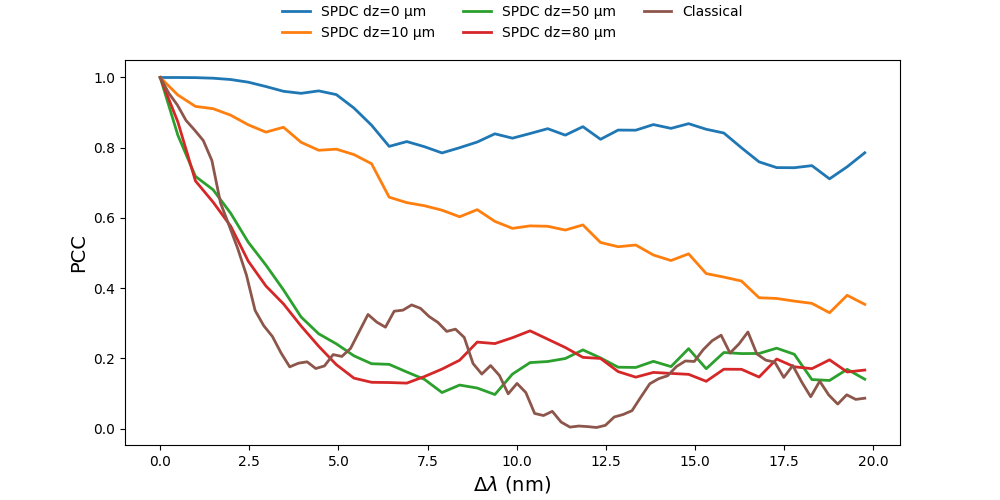

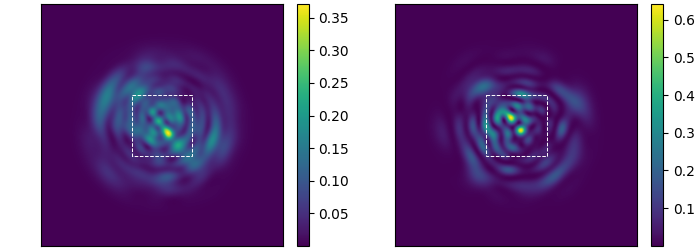

In [30]:
iter_no = None
dz = 0
print(res.metadata["g_params_list"][iter_no or 0])
res.show(title='', iter_no=iter_no, show0=False)
# for i in range(5):
    # res.show_incoherent_sum(iter_no=i, dz=dz)
    # res.show(title='', iter_no=i, show0=False)

res.show_incoherent_sum(iter_no=iter_no, dz=dz)

## View input and output fields + mode distribution for given gaussian params 

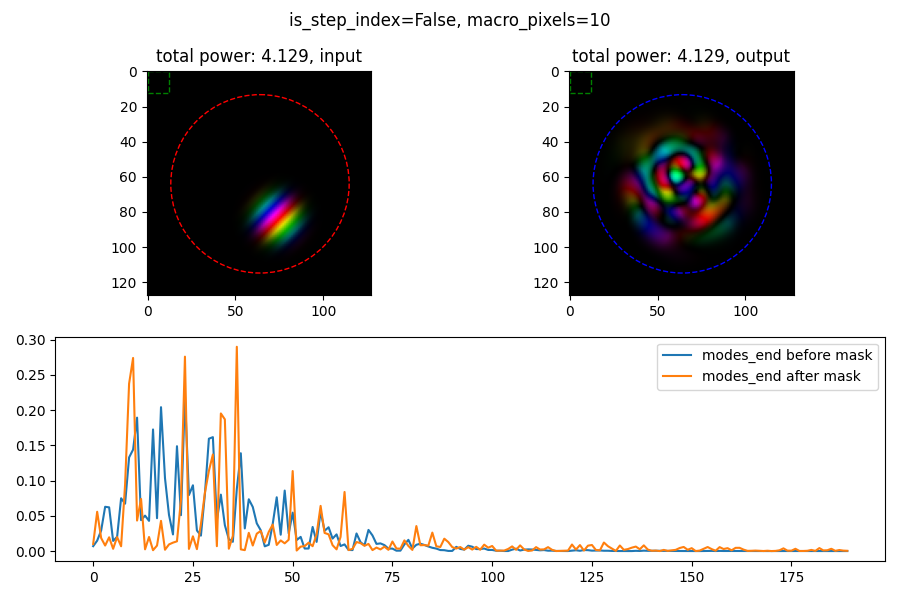

In [122]:
import cv2
from qdc.mmf.fiber import Fiber

is_step_index = False
f = Fiber(is_step_index=is_step_index)
f.set_input_gaussian(sigma=3, X0=5, Y0=10, X_linphase=0.4, Y_linphase=0.4, random_phase=0.0)
f.propagate(False)

fig, axes = plt.subplot_mosaic(
    [["left", "right"],
     ["bottom", "bottom"]],
    figsize=(9, 6)
)

from matplotlib import patches
# make circle centered in the middle of the plot
circle = patches.Circle((f.npoints//2, f.npoints//2), 25/f.index_profile.dh, color='red', fill=False, linestyle='dashed')
axes["left"].add_patch(circle)
circle = patches.Circle((f.npoints//2, f.npoints//2), 25/f.index_profile.dh, color='blue', fill=False, linestyle='dashed')
axes["right"].add_patch(circle)


f.show_profile(f.profile_0,   ax=axes["left"],   title='input')
f.show_profile(f.profile_end, ax=axes["right"],  title='output')

# axes["bottom"].plot(np.abs(f.modes_0)**2, label='modes 0')
axes["bottom"].plot(np.abs(f.modes_0)**2, label='modes_end before mask')

macro_pixels = 10
sqare_size = f.npoints//macro_pixels
square = patches.Rectangle((0,0), sqare_size, sqare_size, color='green', fill=False, linestyle='dashed')
axes["left"].add_patch(square)
square = patches.Rectangle((0,0), sqare_size, sqare_size, color='green', fill=False, linestyle='dashed')
axes["right"].add_patch(square)

A = np.random.uniform(0, 2*np.pi, size=(macro_pixels, macro_pixels))
A = cv2.resize(A, (f.npoints.item(), f.npoints.item()), interpolation=cv2.INTER_AREA)
A = np.exp(1j*A)
profile_after_mask = f.profile_end * A.ravel()
modes_after_mask = f.modes.getModeMatrix().T @ profile_after_mask

axes["bottom"].plot(np.abs(modes_after_mask)**2, label='modes_end after mask')

axes["bottom"].legend()
fig.suptitle(f'is_step_index={is_step_index}, macro_pixels={macro_pixels}')
plt.tight_layout()

In [ ]:
f.show_mode(20)

In [ ]:
for f in s.fibers:
    print(f.NA)
    print(f.Nmodes)

# Irelevant scans from lab 

In [ ]:
from pianoq_results.scan_result import ScanResult
import glob
paths = glob.glob(r'G:\My Drive\People\Ronen\PHD\SPDC2025\phase_matching\Scans\2025_07*.scan')
paths

from pianoq.misc.mplt import mimshow
# path_i = 0
path = r"G:\My Drive\People\Ronen\PHD\SPDC2025\phase_matching\Scans\2025_06_29_14_28_05_first_full_dx=0.05_no_pump_lens.scan"
# path = r"G:\My Drive\People\Ronen\PHD\SPDC2025\phase_matching\Scans\2025_06_29_15_18_48_first_full_dx=0.05_with_lens.scan"
# path = paths[path_i]
print(path)
sr = ScanResult(path)
mimshow(sr.coincidences - (sr.single1s * sr.single2s * 2 * 4e-9))

In [97]:
is_step_index = True
fiber_L = 0.1e6  if is_step_index else 2e6 # um 
N_wl = 1
N_classical = 1
N_SPDC = 1
wl0 = 0.810
Dwl = 0.020 if is_step_index else 0.020
NA_ref = 0.2   
dzs = [0, 10, 50, 200, 1000] if is_step_index else [0, 10, 50, 80]
# dzs = [0]
free_mode_matrix = False
autosolve = not free_mode_matrix

npoints = 2**7
n_pixels_diameter = 2*npoints//5 if is_step_index else npoints//4
s = ManyWavelengthFiber(wl0=wl0, Dwl=Dwl, N_wl=N_wl, fiber_L=fiber_L, rng_seed=5555, is_step_index=is_step_index, 
                        npoints=npoints, NA_ref=NA_ref, autosolve=autosolve)
s.fibers[0].modes.getModeMatrix().shape[1]

Getting 1 fibers...


1it [00:00,  9.56it/s]

Got fibers!


370

SyntaxError: invalid syntax (773084641.py, line 1)